<div style = "display: flex; background-color: RGB(255,114,0);">
   <h1 style = "margin: auto; padding: 30px; "> Suite_Brief6_Immo - Simplon Dev IA </h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Partie 1 - Librairies et fonctions</h2>
</div>

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
#from pandas import Series, DataFrame
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 
# metric pour calculer: à quel point on juste ou faut
from sklearn.metrics import mean_squared_error

In [7]:
pd.set_option("display.max_columns",43);

In [8]:
df_complet = pd.read_csv('/content/gdrive/MyDrive/P9_immo/valeursfoncieres-2020.txt',delimiter = '|',low_memory=False)
df_copy = df_complet.copy()

In [9]:
df_complet_reduit = df_complet[df_complet.columns[df_complet.isna().sum()/df_complet.shape[0] <0.9]]
df_complet_reduit.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,07/01/2020,Vente,"8000,00",NaN,NaN,B063,FORTUNAT,1250.0,CEYZERIAT,01,72,AK,216,NaN,0,NaN,NaN,NaN,NaN,T,1061.0
1,1,02/01/2020,Vente,"2175,00",NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,B,4,NaN,0,NaN,NaN,NaN,NaN,BT,85.0
2,1,02/01/2020,Vente,"2175,00",NaN,NaN,B006,BOIS DU CHAMP RION,1290.0,LAIZ,01,203,B,173,NaN,0,NaN,NaN,NaN,NaN,T,1115.0
3,1,02/01/2020,Vente,"2175,00",NaN,NaN,B025,EN COROBERT,1290.0,LAIZ,01,203,B,477,NaN,0,NaN,NaN,NaN,NaN,T,1940.0
4,1,02/01/2020,Vente,"2175,00",NaN,NaN,B124,TERRES DES CINQ SAULES,1290.0,LAIZ,01,203,C,68,NaN,0,NaN,NaN,NaN,NaN,T,1148.0


In [86]:
def affichage():
  for col in df_complet_reduit.select_dtypes('object'):
      ret = print(f'{col :-<50} {df_complet_reduit[col].unique()}')
  print(df_complet_reduit.columns)
  return ret

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Fonction qui resume tout mon notbook</h2>
</div>

In [104]:
def preprocessing(df_nouveau):
    #df_nouveau = df_nouveau[df_nouveau.columns[df_nouveau.isna().sum()/df_nouveau.shape[0] <0.9]]
    df_nouveau['Date mutation'] = pd.to_datetime(df_nouveau[ 'Date mutation'], format='%d/%m/%Y')
    df_nouveau['year'] = df_nouveau['Date mutation'].dt.year
    df_nouveau['months'] = df_nouveau['Date mutation'].dt.month
    df_nouveau['day'] = df_nouveau['Date mutation'].dt.day
    df_nouveau['Valeur fonciere'] = df_nouveau['Valeur fonciere'].str.replace(',', '.')
    df_nouveau['Valeur fonciere'] = df_nouveau['Valeur fonciere'].astype(float)
    df_nouveau = df_nouveau[df_nouveau['Valeur fonciere']<1000000.00]
    df_nouveau['Code postal'] = df_nouveau['Code postal'].astype(str)
    df_nouveau['Code departement'] = df_nouveau['Code departement'].astype(str)
    df_nouveau = df_nouveau[df_nouveau['Nature mutation'].isin(["Vente","Vente en l'Ã©tat futur d'achÃ¨vement","Vente terrain Ã\xa0 bÃ¢tir"])]
    df_nouveau = df_nouveau[df_nouveau['Type de voie'].isin(['RUE', 'AV'])]
    df_nouveau = df_nouveau[df_nouveau['Type local'].isin(["Maison","Appartement"])]
    df_nouveau = df_nouveau.drop(['Nature culture','Surface terrain', 'year'],axis=1)
    df_nouveau = df_nouveau[df_nouveau['Nombre pieces principales']<10]
    df_nouveau['prix au m2'] = df_nouveau['Valeur fonciere']/df_nouveau['Surface reelle bati']
    #df_nouveau['Type local'] = df_nouveau['Type local'].fillna('mode')
    #df_nouveau['Type local'] = df_nouveau['Type local'].astype(int)
    #df_nouveau = df_nouveau['Type local'].replace(['Appartement','Maison'], [0,1], inplace=True)
    #df_nouveau = df_nouveau['Nature mutation'].replace(['Vente'], [1], inplace=True)
    #df_nouveau['Nature culture'].value_counts(dropna=False)
    #df_nouveau['Surface terrain'].value_counts(dropna=False)
    df_nouveau = df_nouveau.dropna(inplace=False, axis=0)
    return df_nouveau

df_nouveau = df_complet_reduit.copy()
df_nouveau = preprocessing(df_nouveau)

In [ ]:
# Les 5 premieres lignes de jeu de données
df_nouveau.head(5).T

,14,24,47,60,77
No disposition,1,1,1,1,1
Date mutation,2020-01-06 00:00:00,2020-01-13 00:00:00,2020-01-09 00:00:00,2020-01-08 00:00:00,2020-01-07 00:00:00
Nature mutation,Vente,Vente,Vente,Vente,Vente
Valeur fonciere,54800,97000,99000,70000,143000
No voie,6,16,18,5,70
Type de voie,AV,RUE,RUE,RUE,RUE
Code voie,0770,1770,1770,1320,0440
Voie,DU CHAMP DE FOIRE,DES GRAVES,DES GRAVES,EDGAR QUINET,DE LA POSTE
Code postal,1000.0,1000.0,1000.0,1000.0,1750.0
Commune,BOURG-EN-BRESSE,BOURG-EN-BRESSE,BOURG-EN-BRESSE,BOURG-EN-BRESSE,SAINT-LAURENT-SUR-SAONE


In [ ]:
# Voir les 10 dernieres lignes de jeu de données
df_nouveau.tail(10).T

,2459532,2459533,2459534,2459535,2459536,2459537,2459538,2459539,2459540,2459541
No disposition,1,1,1,1,1,1,1,1,1,1
Date mutation,2020-12-23 00:00:00,2020-12-22 00:00:00,2020-12-22 00:00:00,2020-12-21 00:00:00,2020-12-23 00:00:00,2020-12-23 00:00:00,2020-12-23 00:00:00,2020-12-29 00:00:00,2020-12-29 00:00:00,2020-12-23 00:00:00
Nature mutation,Vente,Vente,Vente,Vente,Vente,Vente,Vente,Vente,Vente,Vente
Valeur fonciere,600000,141293,735000,700000,1,1,1,355000,151000,160010
No voie,16,11,7,5,37,37,37,40,2,147
Type de voie,RUE,RUE,RUE,RUE,RUE,RUE,RUE,RUE,RUE,RUE
Code voie,7338,8922,0440,9408,9318,9318,9318,9382,1223,8525
Voie,DU PETIT MUSC,DU SENTIER,D ARGOUT,DE TRACY,TIQUETONNE,TIQUETONNE,TIQUETONNE,DES TOURNELLES,BOUTAREL,SAINT-DENIS
Code postal,75004.0,75002.0,75002.0,75002.0,75002.0,75002.0,75002.0,75004.0,75004.0,75002.0
Commune,PARIS 04,PARIS 02,PARIS 02,PARIS 02,PARIS 02,PARIS 02,PARIS 02,PARIS 04,PARIS 04,PARIS 02


In [ ]:
df_nouveau.shape

(222090, 22)

In [ ]:
# methode de pandas qui renseigne
df_nouveau.fillna(method='bfill',inplace=True)
df_nouveau.isnull().sum()

No disposition               0
Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code voie                    0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Section                      0
No plan                      0
1er lot                      0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
months                       0
day                          0
dtype: int64

In [ ]:
df_nouveau.describe().T

,count,mean,std,min,25%,50%,75%,max
No disposition,222090.0,1.004858,0.109764,1.00,1.0,1.0,1.0,17.0
Valeur fonciere,222090.0,209673.886022,166859.254135,0.15,99000.0,160000.0,260000.0,999800.0
No voie,222090.0,156.235981,931.371728,1.00,8.0,21.0,53.0,9999.0
Code commune,222090.0,190.833567,163.670117,1.00,68.0,123.0,278.0,905.0
No plan,222090.0,273.715696,425.517082,1.00,60.0,156.0,342.0,8316.0
Nombre de lots,222090.0,1.553550,0.760086,1.00,1.0,1.0,2.0,19.0
Code type local,222090.0,1.959125,0.198002,1.00,2.0,2.0,2.0,2.0
Surface reelle bati,222090.0,56.531969,27.284720,1.00,37.0,55.0,71.0,1400.0
Nombre pieces principales,222090.0,2.604440,1.153209,0.00,2.0,3.0,3.0,9.0
months,222090.0,6.394074,3.481907,1.00,3.0,6.0,9.0,12.0


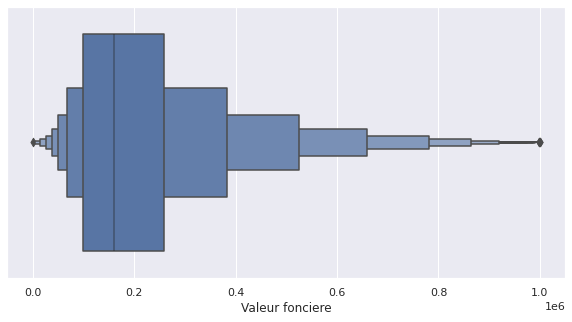

In [ ]:
sns.set(rc = {'figure.figsize': (10, 5)}) 
f, axes = plt.subplots()
sns.boxenplot(df_nouveau['Valeur fonciere']);
plt.show();

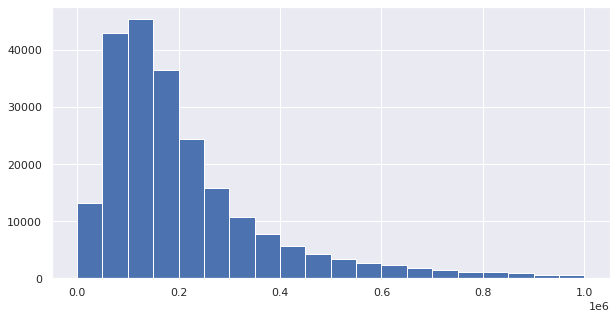

In [ ]:
df_nouveau["Valeur fonciere"].hist(bins=20)
plt.show()

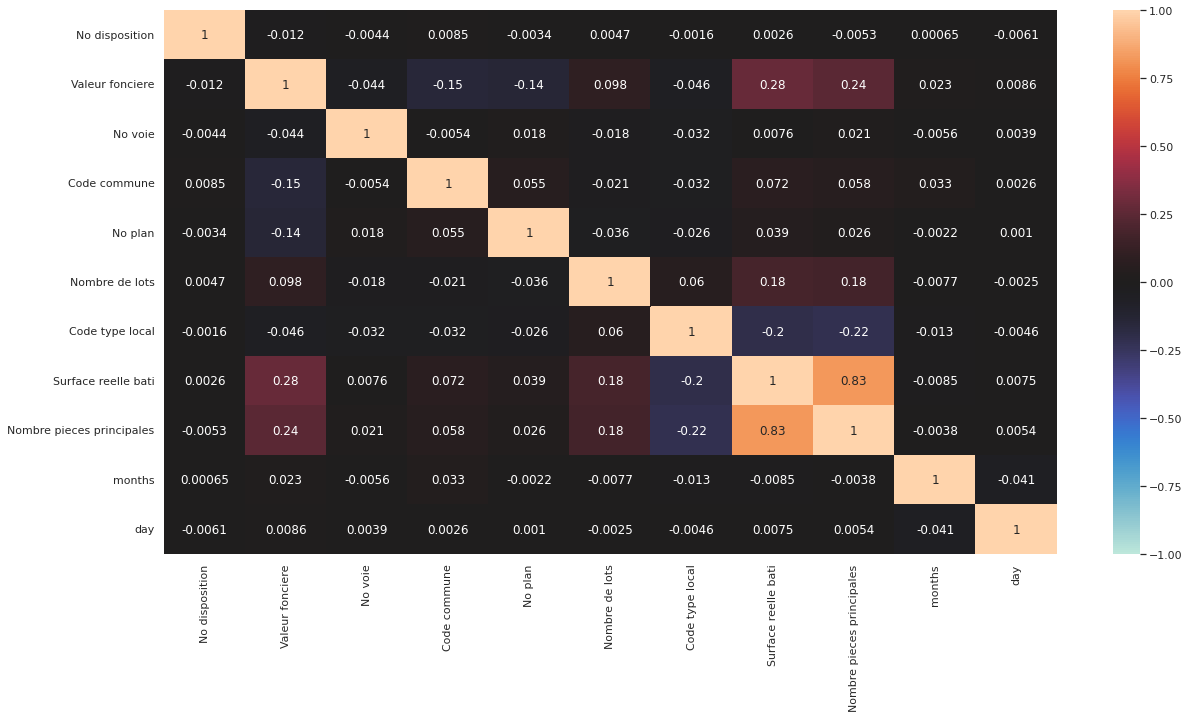

In [ ]:
plt.figure(figsize=(20,10))
correlation = df_nouveau.corr()
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, annot=True);

In [ ]:
print(df_nouveau['Code departement'].count())
print("**********************")
print(df_nouveau['Code postal'].count())

222090
**********************
222090


In [ ]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="Valeur fonciere", data=df_nouveau, palette='hls')
g.set_title("different prix groupes", fontsize=20);
g.set_xlabel('Valeur fonciere', fontsize=15);
g.set_ylabel('Count', fontsize=20);

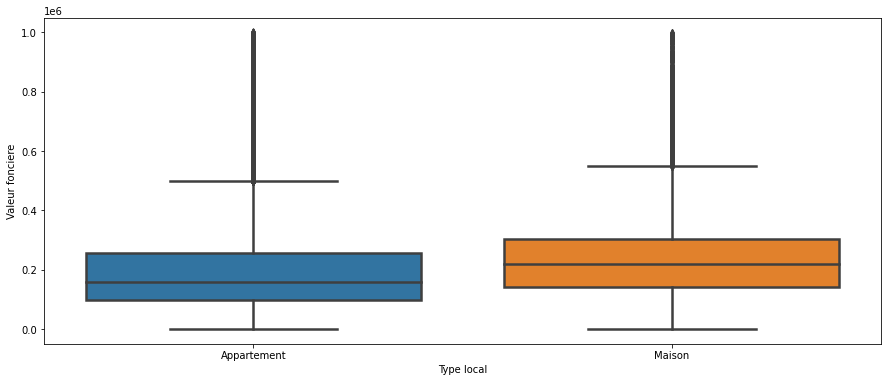

In [12]:
plt.figure(figsize = (15,6))
ax = sns.boxplot(x='Type local', y="Valeur fonciere", data=df_nouveau, linewidth=2.5 )

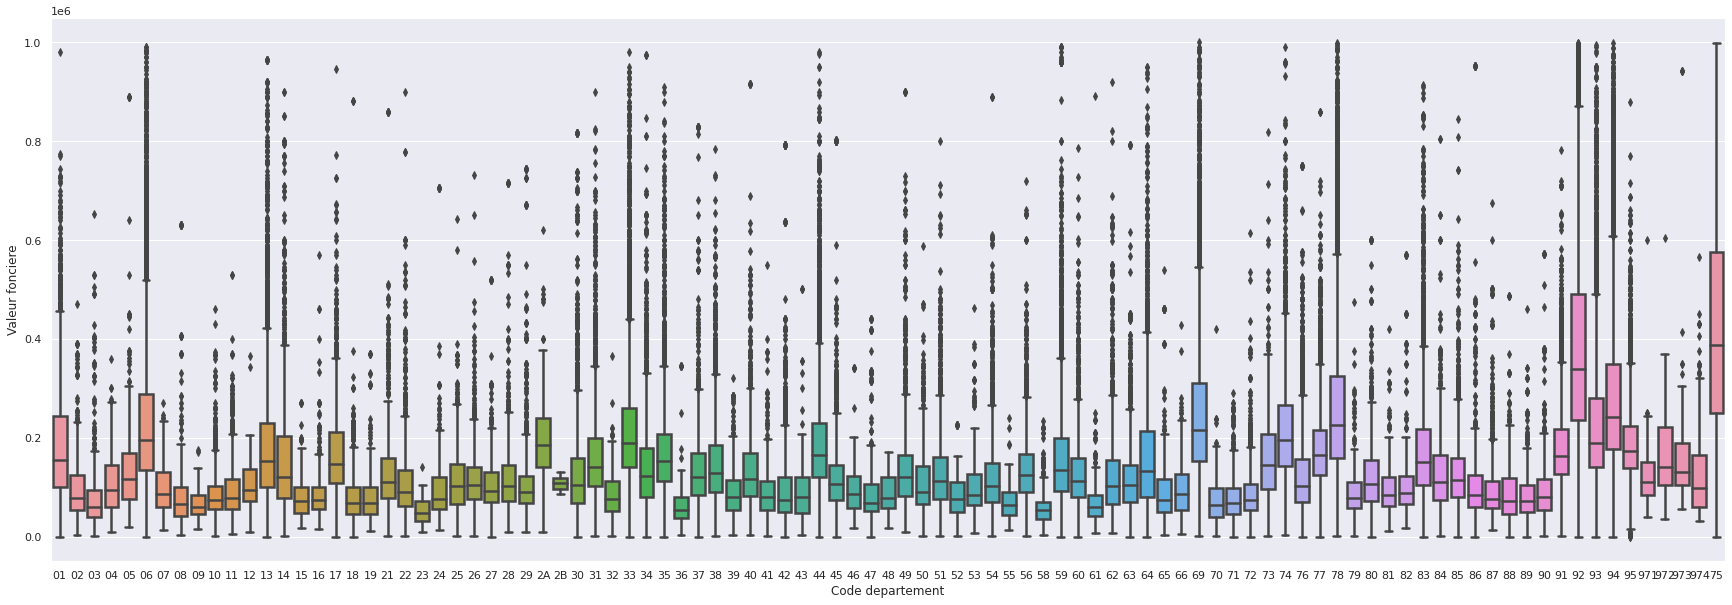

In [15]:
plt.figure(figsize = (30,10))
ax = sns.boxplot(x='Code departement', y="Valeur fonciere", data=df_nouveau, linewidth=2.5 )

In [ ]:
df_nouveau['Code departement'].value_counts()

59     32669
75     23322
77     17577
44     16817
33     16691
       ...  
46       248
12       215
2A       177
971      122
2B         2
Name: Code departement, Length: 97, dtype: int64

In [ ]:
del df_nouveau['Section']

In [ ]:
for col in df_nouveau.select_dtypes('object'):
    print(f'{col :-<50} {df_nouveau[col].unique()}')

Nature mutation----------------------------------- ['Vente']
Type de voie-------------------------------------- ['RUE' 'AV']
Code voie----------------------------------------- ['0970' '0770' '1770' ... '9834' '7338' '9434']
Voie---------------------------------------------- ['COMTE DE LA TEYSSONNIERE' 'DU CHAMP DE FOIRE' 'DES GRAVES' ...
 'N-D DE BONNE NOUVELLE' 'DE PORT-MAHON' 'DES LIONS SAINT PAUL']
Code postal--------------------------------------- ['1000.0' '1370.0' '1250.0' ... '75020.0' '75004.0' '75002.0']
Commune------------------------------------------- ['BOURG-EN-BRESSE' 'MEILLONNAS' 'CORVEISSIAT' ... 'PARIS 20' 'PARIS 04'
 'PARIS 02']
Code departement---------------------------------- ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '58'

In [43]:
#plt.figure(figsize = (30,10))
df_nouveau.groupby(['Code postal','Commune','Nombre pieces principales']).agg({'Valeur fonciere':'mean'}).reset_index()

,Code postal,Commune,Nombre pieces principales,Valeur fonciere
0,1000.0,BOURG-EN-BRESSE,1.0,139722.942857
1,1000.0,BOURG-EN-BRESSE,2.0,99469.058824
2,1000.0,BOURG-EN-BRESSE,3.0,113870.913793
3,1000.0,BOURG-EN-BRESSE,4.0,120303.404068
4,1000.0,BOURG-EN-BRESSE,5.0,143691.666667
...,...,...,...,...
15380,97490.0,SAINT DENIS,6.0,330000.000000
15381,9800.0,CASTILLON-EN-COUSERANS,2.0,120000.000000
15382,nan,GAP,1.0,104300.000000
15383,nan,VILLENEUVE-LOUBET,1.0,164541.666667


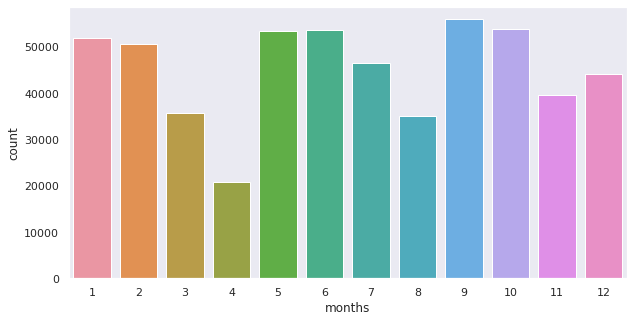

In [ ]:
#Visualisation des la ventes en 2020
# Exploitation et visualisation
sns.set(style='dark');
sns.countplot(x="months", data=df_nouveau);


Maison                                      0.401462
Appartement                                 0.305716
Dépendance                                  0.226753
Local industriel. commercial ou assimilé    0.066070
Name: Type local, dtype: float64

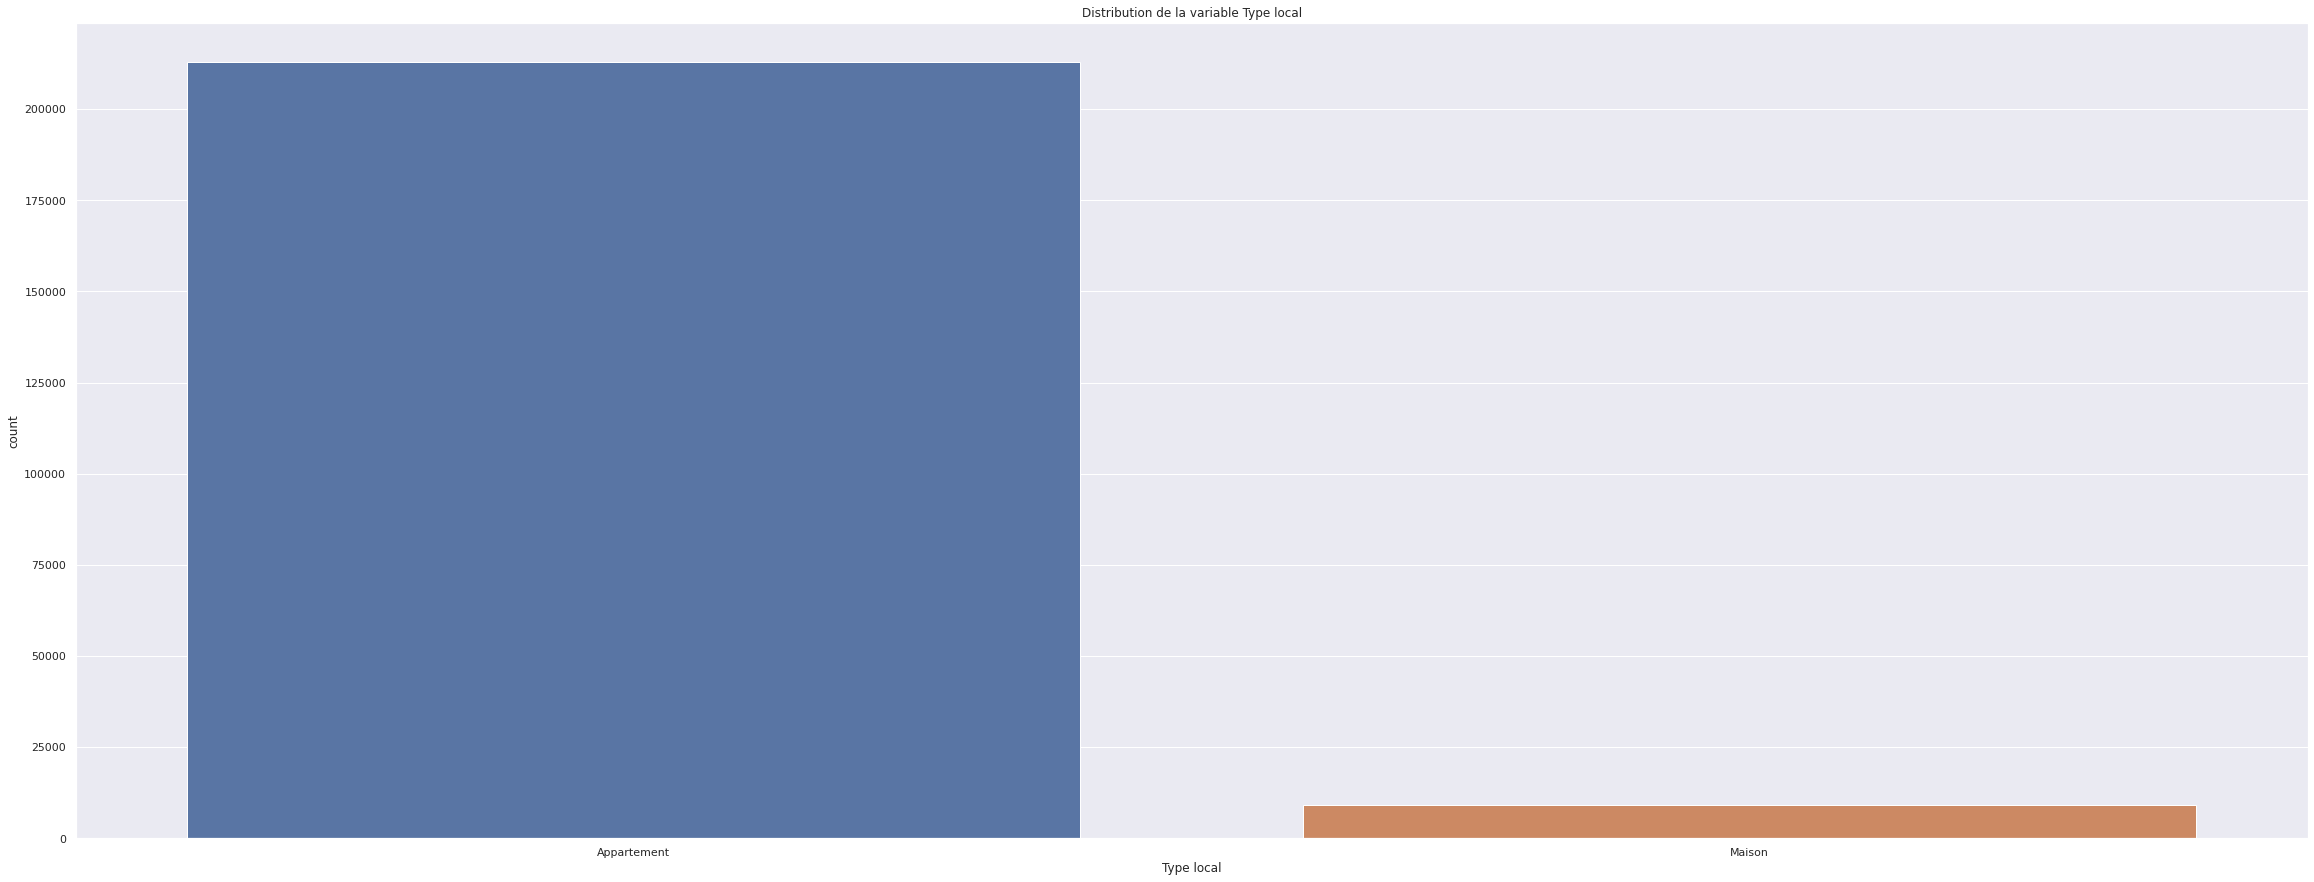

In [27]:
sns.countplot('Type local', data = df_nouveau).set_title("Distribution de la variable Type local");
#CONCLUSION : il faut regler ce probleme avant la Modelisation
df_complet['Type local'].value_counts(normalize = True)

0.0      2.931848e-01
4.0      1.745372e-01
3.0      1.661964e-01
2.0      1.205924e-01
5.0      1.067566e-01
1.0      6.989736e-02
6.0      4.270355e-02
7.0      1.581106e-02
8.0      5.937136e-03
9.0      2.276549e-03
10.0     1.007403e-03
11.0     5.021799e-04
12.0     2.465247e-04
13.0     1.369582e-04
14.0     6.391381e-05
15.0     3.423954e-05
16.0     2.586987e-05
17.0     1.597845e-05
18.0     9.891423e-06
20.0     8.369665e-06
22.0     7.608787e-06
24.0     7.608787e-06
19.0     6.087029e-06
23.0     5.326151e-06
21.0     4.565272e-06
25.0     4.565272e-06
28.0     2.282636e-06
30.0     1.521757e-06
70.0     1.521757e-06
44.0     1.521757e-06
32.0     1.521757e-06
55.0     1.521757e-06
54.0     1.521757e-06
27.0     7.608787e-07
109.0    7.608787e-07
35.0     7.608787e-07
38.0     7.608787e-07
41.0     7.608787e-07
26.0     7.608787e-07
51.0     7.608787e-07
71.0     7.608787e-07
84.0     7.608787e-07
97.0     7.608787e-07
33.0     7.608787e-07
Name: Nombre pieces principales,

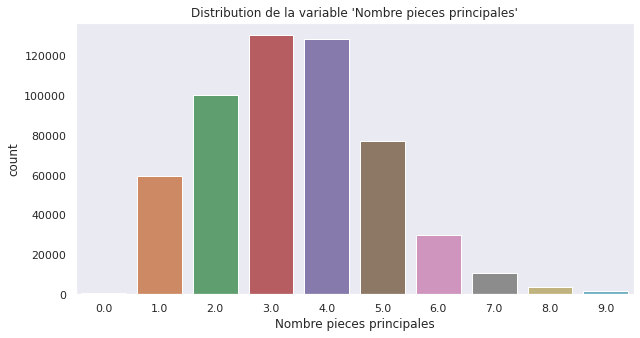

In [ ]:
sns.countplot('Nombre pieces principales', data = df_nouveau).set_title("Distribution de la variable 'Nombre pieces principales'");
#CONCLUSION : il faut regler ce probleme avant la Modelisation
df_complet['Nombre pieces principales'].value_counts(normalize = True)

In [33]:
#sns.set(rc = {'figure.figsize': (40, 15)}) 
#sns.boxplot(x="Commune", y="Valeur fonciere", data=df_nouveau);

In [38]:
df_nouveau.groupby(["Nature mutation"])['Valeur fonciere'].mean()

Nature mutation
Vente    209673.886022
Name: Valeur fonciere, dtype: float64

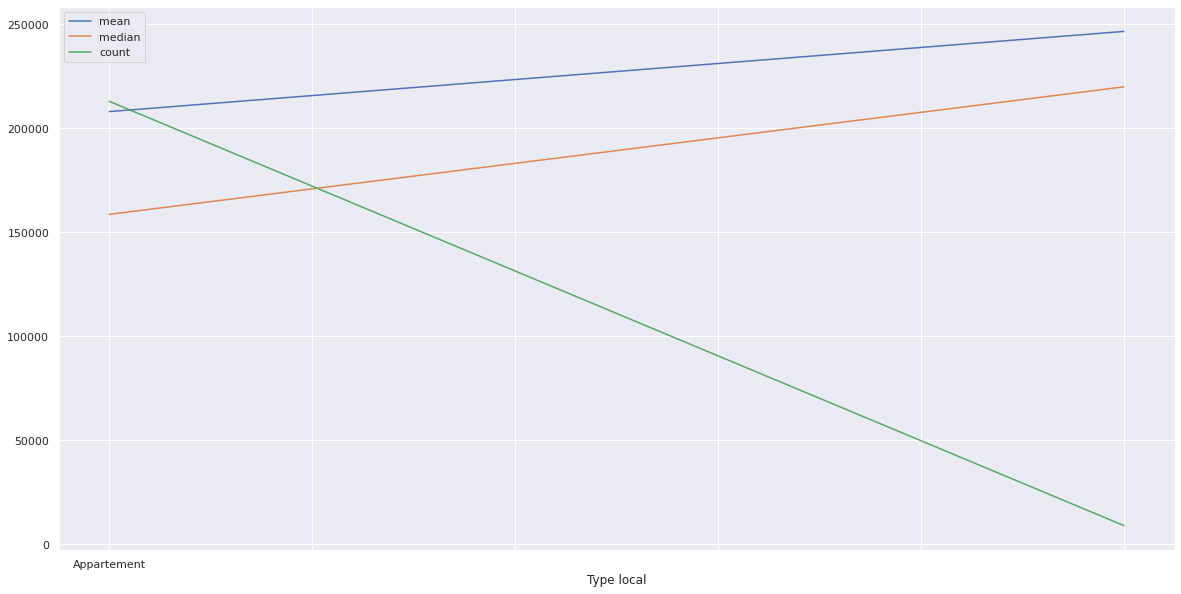

In [44]:
df_nouveau.groupby("Type local")['Valeur fonciere'].agg(["mean", "median", "count"]).plot(figsize=[20,10]);

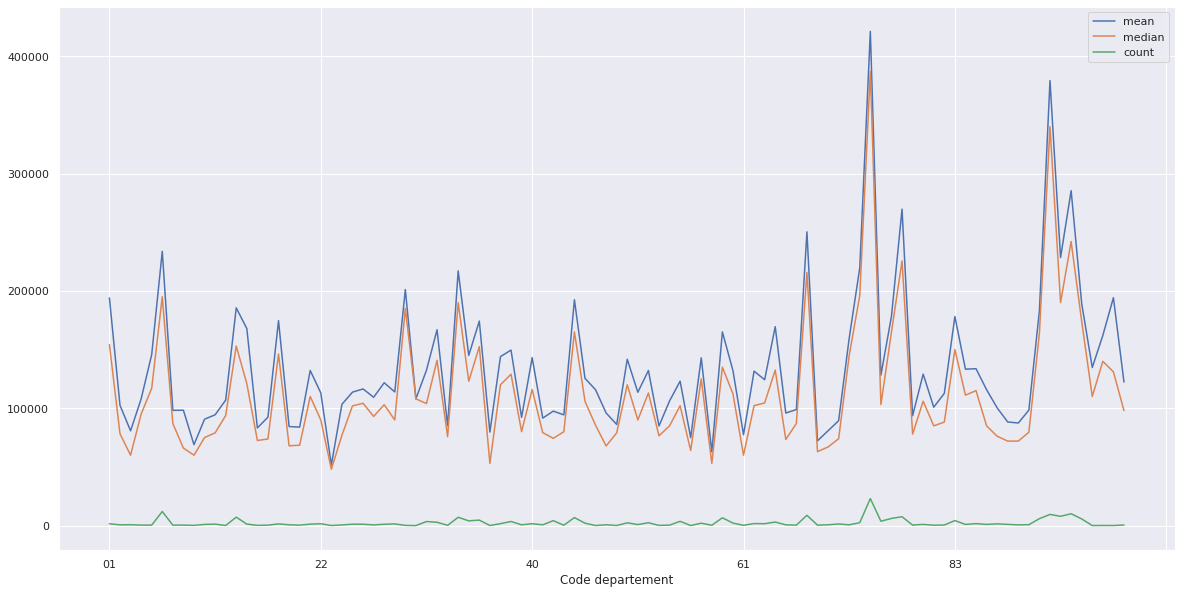

In [45]:
"Valeur fonciere"

In [47]:
df_nouveau.groupby(['Type local','Code postal','Commune']).agg({'Valeur fonciere':'mean'})

Valeur fonciere
Type local  Code postal Commune                               
Appartement 1000.0      BOURG-EN-BRESSE          117874.574019
                        SAINT-DENIS-LES-BOURG    151524.000000
            10000.0     TROYES                    93663.988000
            10100.0     ROMILLY SUR SEINE         61422.222222
            10110.0     BAR SUR SEINE             56500.000000
...                                                        ...
Maison      97430.0     LE TAMPON                146050.000000
            97438.0     SAINTE MARIE              42706.950000
            97450.0     SAINT-LOUIS              182500.000000
            97480.0     SAINT-JOSEPH              55000.000000
            97490.0     SAINT DENIS              194250.000000

[7066 rows x 1 columns]

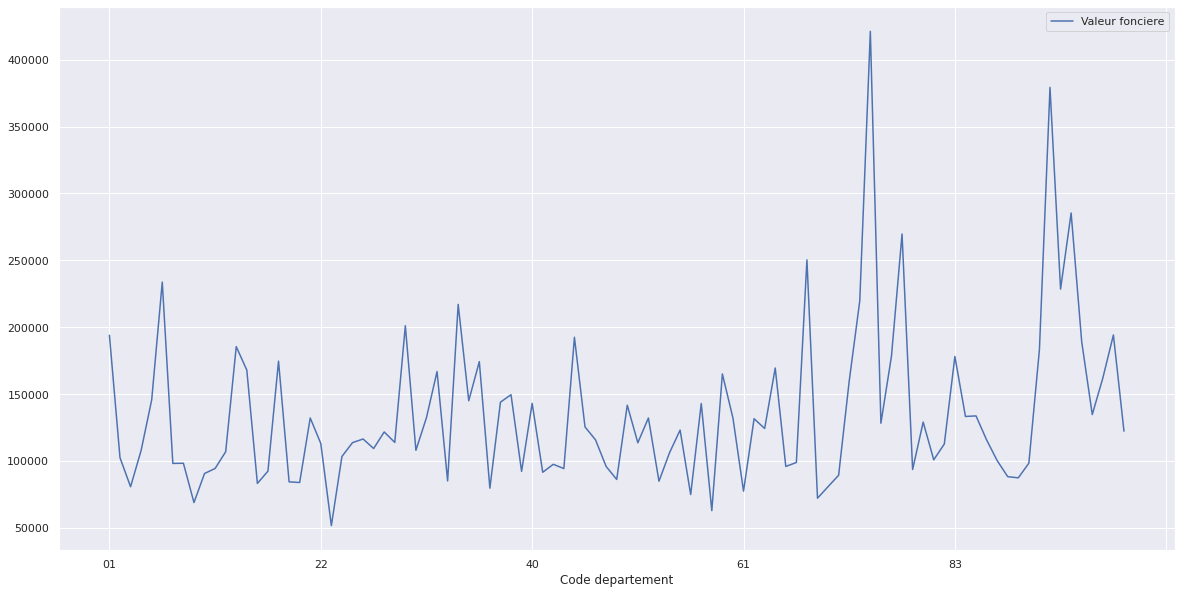

In [49]:
df_nouveau.groupby(['Code departement']).agg({'Valeur fonciere':'mean'}).plot(figsize=[20,10]);

In [ ]:
df_nouveau.groupby(['Code postal','Code departement','Nombre pieces principales']).agg({'Valeur fonciere':'mean'})

Valeur fonciere
Code postal Code departement Nombre pieces principales                 
1000.0      01               1.0                          154186.325000
                             2.0                          141526.694444
                             3.0                          142002.876543
                             4.0                          154398.031910
                             5.0                          185882.010714
...                                                                 ...
nan         06               3.0                          365000.000000
            24               2.0                           62000.000000
                             3.0                           82000.000000
            34               3.0                          332000.000000
            72               5.0                          180000.000000

[33681 rows x 1 columns]

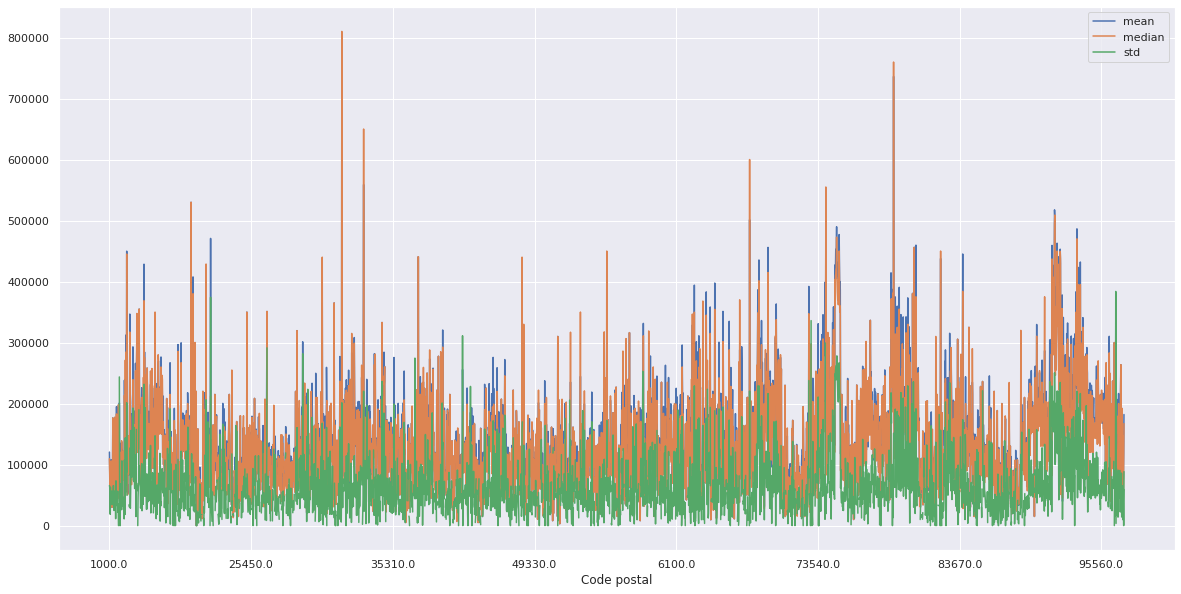

In [59]:
df_nouveau.groupby('Code postal')['Valeur fonciere'].agg(["mean", "median", "std"]).plot(figsize=[20,10]);

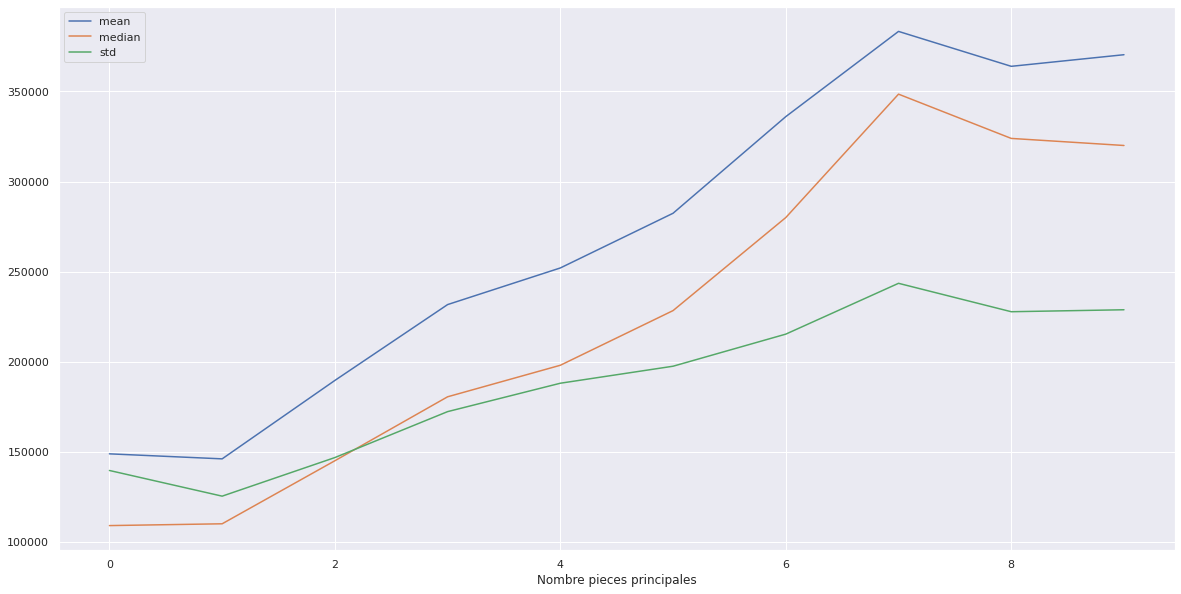

In [58]:
df_nouveau.groupby(['Nombre pieces principales'])['Valeur fonciere'].agg(['mean','median','std']).plot(figsize=[20,10]);

In [ ]:
#pip install category_encoders
import category_encoders as ce
df_cat = pd.DataFrame({'VariableCetegoriels':['Code postal','Maîtrise','Commune','Code departement']})

In [ ]:
# Voir si il y'a des colonnes qui sont dupliques stricté
print(df_complet_reduit.drop_duplicates().shape)
# Voir le df_reduit à 90% des nan
print("Base de données à 90%",df_complet_reduit.shape)
print("Base de nouveau",df_nouveau.shape)

(2380954, 22)
Base de données à 90% (2459560, 22)
Base de nouveau (222090, 22)


In [ ]:
# Voir ce qu'il y'a dans la colonne
df_complet_reduit['Type local'].value_counts()

Maison                                      528257
Appartement                                 402271
Dépendance                                  298369
Local industriel. commercial ou assimilé     86937
Name: Type local, dtype: int64

In [ ]:
# Il envele des nan
df_nouveau['Type local'].value_counts(dropna=True)

Appartement    213012
Maison           9078
Name: Type local, dtype: int64

In [ ]:
df_complet_reduit['Type local'].isna().sum()

1143726

In [72]:
#Aller voir dans maps pour les valeurs atypiques extreme**
df_filtre_sur_Clermont_ferrand = df_nouveau[(df_nouveau['Commune']=='CLERMONT FERRAND')& (df_nouveau['Valeur fonciere']<1000000)]
df_filtre_sur_Clermont_ferrand

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,months,day
1548662,1,2020-01-03,Vente,139200.0,28.0,AV,0950,CHARRAS,63000.0,CLERMONT FERRAND,63,113,HV,76,11,1,2.0,Appartement,73.0,4.0,1,3
1548667,1,2020-01-02,Vente,120250.0,29.0,RUE,2731,DE MALINTRAT,63100.0,CLERMONT FERRAND,63,113,AN,97,56,1,2.0,Appartement,83.0,4.0,1,2
1548671,1,2020-01-06,Vente,181452.0,9.0,RUE,4690,VOLNEY,63000.0,CLERMONT FERRAND,63,113,HM,209,56,2,2.0,Appartement,60.0,3.0,1,6
1548704,1,2020-01-06,Vente,83000.0,5.0,RUE,2400,JEAN AICARD,63100.0,CLERMONT FERRAND,63,113,LO,626,1,2,2.0,Appartement,52.0,3.0,1,6
1548724,1,2020-01-10,Vente,26600.0,68.0,AV,4515,DE L UNION SOVIETIQUE,63000.0,CLERMONT FERRAND,63,113,CD,148,166,1,2.0,Appartement,19.0,1.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558135,1,2020-08-04,Vente,70000.0,29.0,RUE,2895,DES MEUNIERS,63000.0,CLERMONT FERRAND,63,113,EO,1241,5,2,2.0,Appartement,26.0,1.0,8,4
1558140,1,2020-08-26,Vente,149000.0,4.0,RUE,4688,DES VOLCANS,63000.0,CLERMONT FERRAND,63,113,ER,752,115,2,2.0,Appartement,82.0,3.0,8,26
1558149,1,2020-08-26,Vente,29500.0,27.0,RUE,3005,MONTLOSIER,63000.0,CLERMONT FERRAND,63,113,IZ,68,20,1,2.0,Appartement,14.0,1.0,8,26
1558153,1,2020-10-06,Vente,131100.0,9.0,RUE,2810,MARIVAUX,63000.0,CLERMONT FERRAND,63,113,EV,196,9,2,2.0,Appartement,47.0,2.0,10,6


In [ ]:
df_type_bien = df_complet_reduit[df_complet_reduit['Type local'].isin(["Maison","Appartement"])]

In [ ]:
df_nouveau['Nombre pieces principales'].unique()

array([2., 4., 1., 3., 5., 9., 6., 7., 8., 0.])

In [78]:
#import plotly.express as px
#fig = px.box(df_nouveau, x="months", y="Valeur fonciere", hover_data=['Commune','Type local', 'Code departement'])
#fig

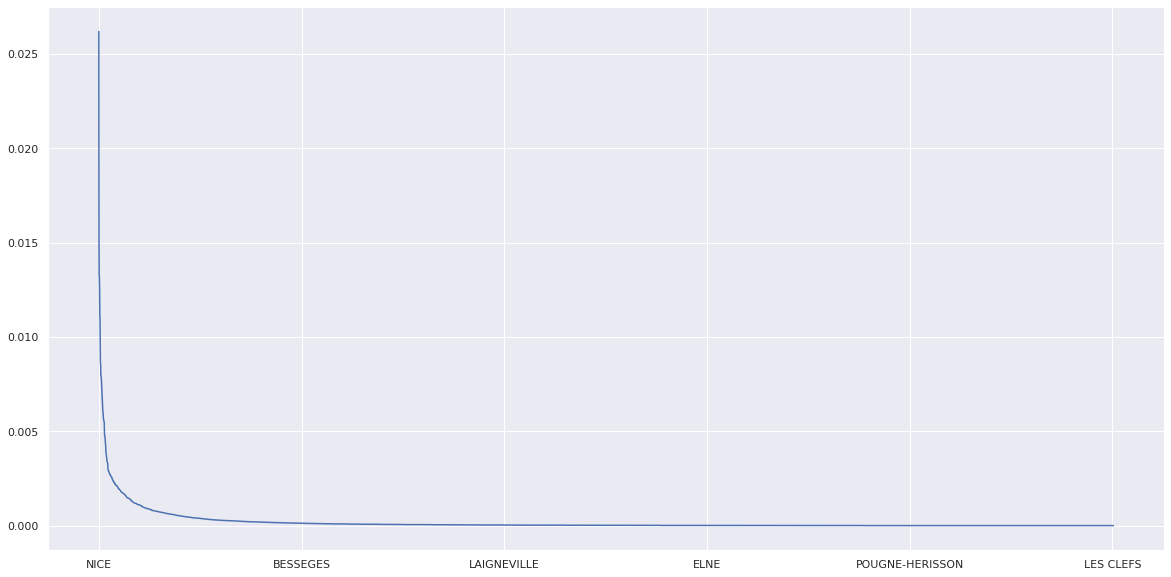

In [82]:
# le code postale le plus VENDU : 51100.0 .Nice 
# Ensuite c'est NANTES
# Apres BORDEAUX
df_nouveau['Commune'].value_counts(normalize=True).plot(figsize=[20,10]);

In [98]:
#df_nouveau[df_nouveau['Commune']=="CLERMONT FERRAND"].value_counts(normalize=True).plot(figsize=[10,5]);


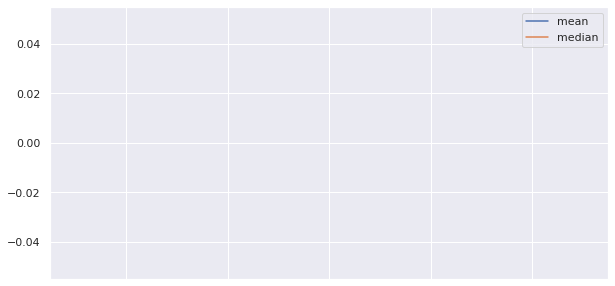

In [96]:
df_nouveau.groupby({'Commune':"CLERMONT FERRAND"})['Valeur fonciere'].agg(["mean", "median"]).plot(figsize=[10,5]);

In [ ]:
del df_nouveau['Section']

In [ ]:
pd.set_option("display.max_columns",43);

In [99]:
# Voir par rapport à une commune
df_nouveau[df_nouveau['Commune']=='NICE']

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,1er lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,months,day
83637,1,2020-01-03,Vente,616900.0,8.0,RUE,5600,ROSSINI,6000.0,NICE,06,88,LA,312,19,2,2.0,Appartement,98.0,4.0,1,3
83640,1,2020-01-10,Vente,405000.0,1.0,RUE,6570,VALPERGA,6000.0,NICE,06,88,LB,129,4,1,2.0,Appartement,90.0,4.0,1,10
83643,1,2020-01-03,Vente,212550.0,27.0,RUE,3535,LAMARTINE,6000.0,NICE,06,88,LB,299,33,1,2.0,Appartement,95.0,3.0,1,3
83645,1,2020-01-07,Vente,160000.0,5.0,RUE,2295,EMMANUEL PHILIBERT,6300.0,NICE,06,88,KO,73,20,1,2.0,Appartement,34.0,3.0,1,7
83646,1,2020-01-10,Vente,320000.0,28.0,AV,2475,FLORES,6000.0,NICE,06,88,LK,179,7,1,2.0,Appartement,31.0,2.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104828,1,2020-10-26,Vente,180000.0,65.0,AV,2325,ESTIENNE D ORVES,6000.0,NICE,06,88,MK,82,131,2,2.0,Appartement,50.0,3.0,10,26
104838,1,2020-10-29,Vente,208000.0,8.0,AV,5074,PIERRE ISNARD,6200.0,NICE,06,88,OH,389,47,1,2.0,Appartement,72.0,3.0,10,29
104851,1,2020-10-29,Vente,238000.0,23.0,AV,3734,LOUIS CAPPATTI,6200.0,NICE,06,88,OI,362,37,1,2.0,Appartement,48.0,2.0,10,29
104854,1,2020-10-26,Vente,500000.0,276.0,AV,6035,SAINTE MARGUERITE,6200.0,NICE,06,88,OL,212,1,1,1.0,Maison,61.0,4.0,10,26


In [102]:
df_nouveau[df_nouveau['Code departement']== 75].sort_values('prix au m2')[[ 'Valeur fonciere','Commune']]

KeyError: ignored

In [ ]:
# Voir par rapport à une commune 'NICE' les ventes selon les date
df_nouveau[df_nouveau['Commune']=='NICE'].sort_values('Date mutation')[['Valeur fonciere', 'Date mutation']]

,Valeur fonciere,Date mutation
83776,210000.0,2020-01-02
83775,117000.0,2020-01-02
83838,105000.0,2020-01-02
83666,229500.0,2020-01-02
83825,199000.0,2020-01-03
...,...,...
98432,111000.0,2020-12-30
96926,183000.0,2020-12-30
98123,60000.0,2020-12-30
98612,190000.0,2020-12-31


In [ ]:
# Voir par rapport à une commune 'NICE' les ventes selon les date
df_nouveau[df_nouveau['Commune']=='LILLE'].sort_values('Date mutation')[['Valeur fonciere','Code postal' ]]

,Valeur fonciere,Code postal
1369171,200000.0,59000.0
1369422,150000.0,59800.0
1370196,85000.0,59260.0
1369139,192000.0,59800.0
1369224,294000.0,59260.0
...,...,...
1382733,85000.0,59000.0
1382675,161000.0,59000.0
1382637,150000.0,59000.0
1382944,92500.0,59260.0


In [ ]:
df_nouveau['Code postal'].value_counts()

51100.0    2443
6000.0     2378
54000.0    1997
72000.0    1875
35000.0    1865
           ... 
36180.0       1
14260.0       1
20172.0       1
20135.0       1
38370.0       1
Name: Code postal, Length: 5753, dtype: int64

In [ ]:
# Voir le prix au mettre carre
df_nouveau['prix au m2'] = df_nouveau['Valeur fonciere']/df_nouveau['Surface reelle bati']
df_nouveau['prix au m2']

11          2057.142857
13          2404.000000
14          1712.500000
22          1073.000000
23          1192.222222
               ...     
2459537        0.032258
2459538        0.032258
2459540    15100.000000
2459541    11429.285714
2459559    12142.857143
Name: prix au m2, Length: 677157, dtype: float64

In [ ]:
df_nouveau['prix au m2'].unique()

array([ 2057.14285714,  2404.        ,  1712.5       , ...,
        9419.53333333, 15100.        , 11429.28571429])

In [ ]:
#df_nouveau[df_nouveau['Commune']=='LILLE']
df_nouveau['Code departement']drop_duplicates

11          1
13          1
14          1
22          1
23          1
           ..
2459537    75
2459538    75
2459540    75
2459541    75
2459559    75
Name: Code departement, Length: 677157, dtype: object

In [ ]:
# moyenne de vente par annee

In [ ]:
# moyenne de vente par mois

In [ ]:
# Faire la moyenne des vente par jour

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Les visualisation impossable à realiser</h2>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Modelisation pour voir les variables les plus essentielles</h2>
</div>

## Pour X on va recupere les int et float + les colonnes ou il y'a pas beaucoup de null

In [ ]:
y = df_nouveau['Valeur fonciere']
# toutes ces colonnes vont contribie à la prediction du model
# 'prix au m2' : On va eviter de la prendre car la variable a ete contruit à partir de la target: 
# Conclusion : Overtiting
X = df_nouveau[['Surface reelle bati', 'Nombre pieces principales']]

In [ ]:
# Diviser les données on variable Cible et explicatives
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print("*******************")
print(X_test.shape)
print(y_test.shape)

(474009, 2)
(474009,)
*******************
(203148, 2)
(203148,)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Faire une RandomForest simple</h2>
</div>

In [ ]:
def foretAleatoire(X_train, y_train,X_test, y_test):
    model_regr = RandomForestRegressor(max_depth=5, random_state=0)
    #X_test.fillna(X_train.mean(), inplace=True)
    #X_train.fillna(X_train.mean(), inplace=True)
    model_regr.fit(X_train, y_train)
    y_pred_regr = model_regr.predict(X_test)
    
    print("Voir le Rmse :",mean_squared_error(y_test, y_pred_regr))
    print("score test : ",model_regr.score(X_test, y_test))
    print("score train : ",model_regr.score(X_train, y_train))
    print("variable importante",model_regr.feature_importances_)
    # ZIP pour recupere les features les plus importantes
    for name, feature in zip([ 'Surface reelle bati', 'Nombre pieces principales'], model_regr.feature_importances_):
        print(name, round(feature*100,1))
    return model_regr

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Le but etant de chercher à savoir quand est ce il fadrait acheter un appartement dans l'année 2020, selon le code postal,...</h2>
</div>

In [ ]:
foretAleatoire(X_train, y_train,X_test, y_test)

Voir le Rmse : 4603156162.42441
score test :  0.09956832028733376
score train :  0.10165048735590199
variable importante [0.77936548 0.22063452]
Surface reelle bati 77.9
Nombre pieces principales 22.1


RandomForestRegressor(max_depth=5, random_state=0)